# Linear Regression

Linear regression is a supervised machine learning algorithm used for predicting a continuous target variable based on one or more independent variables. It establishes a linear relationship between the input variables (also known as features or predictors) and the output variable (also known as the target or dependent variable).

In linear regression, the goal is to find the best-fitting line that minimizes the difference between the predicted values and the actual values of the target variable. 

# cost function 
MAE=Mean Absolute Error and MSE = Mean square Error
cost function indicates difference between the predicted and Actual value
for a given dataset.Ideal value cost function ZERO.

# Library import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')

In [3]:
#Load dataset file csv(comma separated value)
df=pd.read_csv('04 Dhaka Rent - Dhaka Rent.csv')
df.head(5)

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [4]:
df.shape  #shape for dataset row and column showing

(60, 2)

In [5]:
row,col=df.shape #separate row and column

In [6]:
row

60

In [7]:
col

2

In [8]:
df.head() #for showing first 5 line

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [9]:
df.tail()   #for showing last 5 line

,area,rent
55,3100,54000
56,2750,48500
57,1800,25100
58,2200,31560
59,3100,51600


In [10]:
#for specific
df[25:30]

,area,rent
25,3100,53000
26,2750,48000
27,1800,25000
28,2200,31460
29,3100,51400


# Scatter plot

Text(0.5, 1.0, 'Scatter plot')

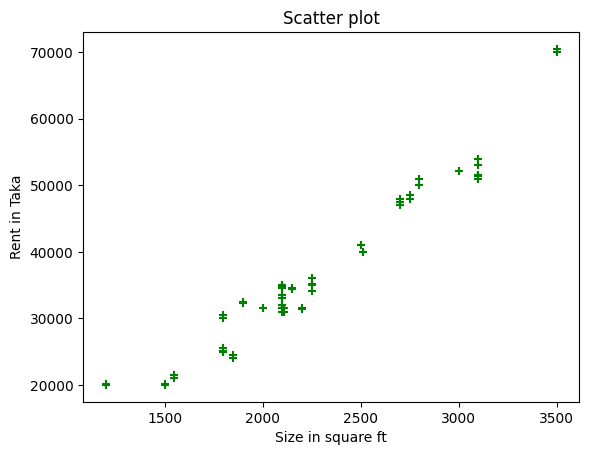

In [11]:
#both will be used but area por space thakle nicher ta effective
#plt.scatter(df.area, df.rent)  
plt.scatter(df[['area']],df[['rent']], color='green',marker='+')
plt.ylabel('Rent in Taka')
plt.xlabel('Size in square ft')
plt.title('Scatter plot')

In [12]:
df.area.mean()  #fine mean of a column whose name area

2289.0

In [13]:
df.rent.mean()  #fine mean of a column whose name rent

37269.166666666664

# Seperate x & y

In [14]:
x=df[['area']]   #separate x whose called independent variable
y=df[['rent']]   #separate y whose called dependent variable

In [15]:
#x=df.drop('rent', axis=1) #axis=1 means colomn, 0 means row

# splitting dataset into train and test set 

In [16]:
#sklean model calling, import and rename as tts
from sklearn.model_selection import train_test_split as tts

In [17]:
#separate variable
xtrain,xtest, ytrain, ytest = tts(x,y,test_size=0.33, random_state =1)#random state 1 means unchanged train data

In [18]:
xtrain.head()

,area
42,2100
56,2750
17,1550
31,2100
49,2700


In [19]:
ytrain.head()

,rent
42,34700
56,48500
17,21000
31,35010
49,47500


# Linear Regression 

In [20]:
#import linear regression model for fit ,train, predict
from sklearn.linear_model import LinearRegression

In [21]:
reg = LinearRegression() #create object

In [22]:
reg.fit(xtrain, ytrain) #training model

LinearRegression()

In [23]:
reg.predict([[2000]])

array([[30927.80436869]])

In [24]:
#find coefficient
m=reg.coef_
m

array([[21.00277515]])

In [25]:
#find intercept
c=reg.intercept_
c

array([-11077.74592515])

In [26]:
#Actual value
predicted = (m*2000) + c
predicted

array([[30927.80436869]])

In [27]:
reg.predict([[2000]])

array([[30927.80436869]])

In [28]:
reg.predict(xtest)

array([[33028.08188338],
       [33028.08188338],
       [41429.19194215],
       [26727.2493393 ],
       [33238.10963485],
       [36178.49815542],
       [36178.49815542],
       [28827.52685399],
       [34078.22064072],
       [26727.2493393 ],
       [47730.02448622],
       [14125.58425115],
       [26727.2493393 ],
       [36178.49815542],
       [46679.88572888],
       [20426.41679523],
       [33028.08188338],
       [34078.22064072],
       [62431.96708907],
       [45629.74697153]])

In [29]:
#full dataset copy
df2 =df.copy()
df2.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [30]:
# adding colomn
df2['predicted'] = reg.predict(df[['area']])
df2.head()

,area,rent,predicted
0,2000,31500,30927.804369
1,2100,35000,33028.081883
2,2500,41050,41429.191942
3,2250,36100,36178.498155
4,3000,52100,51930.579516


# Best fit line

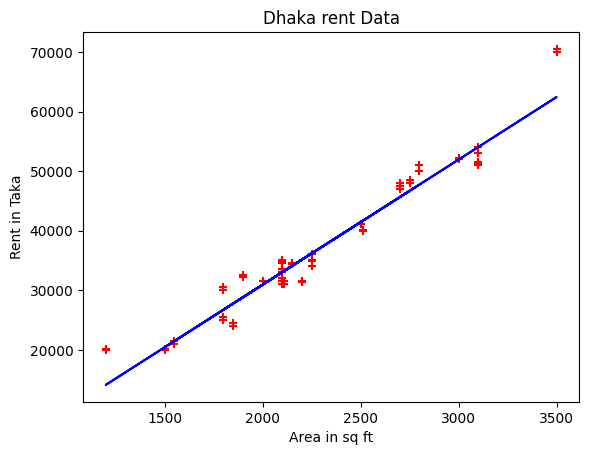

In [31]:
plt.scatter(df[['area']],df[['rent']], color='red', marker='+')
plt.xlabel('Area in sq ft')
plt.ylabel('Rent in Taka')
plt.title('Dhaka rent Data')
plt.plot(xtest,reg.predict(xtest), color='blue')

# Cost & Loss Function calculate

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [33]:
#testing mse
test_mse = mean_squared_error(ytest, reg.predict(xtest))
test_mse

7421807.705906522

In [34]:
#testing mae
test_mae = mean_absolute_error(ytest, reg.predict(xtest))
test_mae

1881.6683699430062

In [35]:
#training MSE
test_mse = mean_squared_error(ytrain, reg.predict(xtrain))
test_mse

6602823.624588491

In [36]:
#training MAE
test_mae = mean_absolute_error(ytrain, reg.predict(xtrain))
test_mae

2034.6296483710926

In [37]:
#ytest actual y ,xtest predicted x

# Accuracy

In [38]:
#r2 score

In [39]:
reg.score(xtest,ytest)  #for Testing accuracy

0.94136433031732

In [40]:
reg.score(xtrain,ytrain)  #for Training accuracy

0.952524928860396

# Save ML Models

In [41]:
import joblib, pickle

In [42]:
pickle.dump(reg, open('pik1','wb'))  #saving wb=write binary

In [43]:
model2 = pickle.load(open('pik1','rb')) #for reading mode

In [44]:
model2

LinearRegression()

In [45]:
reg.predict([[2000]])

array([[30927.80436869]])

In [47]:
model2.predict([[2000]])

array([[30927.80436869]])